# Exercises XP: W3_D3

## What You’ll Learn
- How to apply various statistical functions using **SciPy**  
- Understanding **probability distributions** and **hypothesis testing**  
- Analyzing data with **regression**, **ANOVA**, and **correlation** methods

## What You’ll Create
A set of Python notebooks/scripts that:
- Explore data and compute **descriptive statistics**
- Perform **t-tests** and interpret **p-values**
- Fit and interpret a **linear regression**
- Run **one-way ANOVA** and reason about group differences
- (Optional) Work with **binomial probabilities**
- (Optional) Compute **Pearson** and **Spearman** correlations

## Exercises
**Exercise 1 — Basic Usage of SciPy**  
Import SciPy and display its version.

**Exercise 2 — Descriptive Statistics**  
Given `data = [12, 15, 13, 12, 18, 20, 22, 21]`, compute: mean, median, variance, standard deviation.

**Exercise 3 — Understanding Distributions**  
Generate a normal distribution with mean = 50 and std = 10. Plot the PDF and compare with a random sample.

**Exercise 4 — T-Test Application**  
Generate two normal samples (e.g., around 50 and 60) and run an independent two-sample t-test. Interpret the p-value.

**Exercise 5 — Linear Regression Analysis**  
Use `house_sizes = [50, 70, 80, 100, 120]` and  
`house_prices = [150000, 200000, 210000, 250000, 280000]`.  
Fit a linear regression, report **slope** and **intercept**, predict the price at **90 m²**, and interpret the slope.

**Exercise 6 — Understanding ANOVA**  
With three fertilizer groups:
- `fertilizer_1 = [5, 6, 7, 6, 5]`
- `fertilizer_2 = [7, 8, 7, 9, 8]`
- `fertilizer_3 = [4, 5, 4, 3, 4]`  
Run one-way ANOVA. Report **F** and **p**; decide if means differ significantly.

**Exercise 7 (Optional) — Probability Distributions**  
Compute the probability of exactly 5 heads in 10 fair coin flips using a binomial model.

**Exercise 8 (Optional) — Correlation Coefficients**  
Given `age` and `income`, compute **Pearson** and **Spearman** correlations and compare their meaning.

> **Note:** When randomness is involved, set a seed for reproducibility (e.g., `np.random.seed(42)`).

### Setup & Utilities

In [1]:
# Title: Setup and Common Imports
# Description: Import core libraries used across all exercises.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, ttest_ind, linregress, f_oneway, binom, pearsonr, spearmanr

# For reproducibility of random results
np.random.seed(42)

# Pretty printing helper
def print_separator(title: str):
    print("\n" + "="*20, title, "="*20)

## Exercise 1: Basic Usage of SciPy

In [2]:
# Title: Exercise 1 — Basic Usage of SciPy
# Task: Import SciPy (already done) and display its version.

import scipy
print_separator("SciPy Version")
print("SciPy version:", scipy.__version__)


==================== SciPy Version ====================
SciPy version: 1.13.1


## Exercise 2: Descriptive Statistics

In [3]:
# Title: Exercise 2 — Descriptive Statistics with SciPy
# Task: Compute mean, median, variance, and standard deviation of the sample data.

data = [12, 15, 13, 12, 18, 20, 22, 21]
data_arr = np.array(data)

print_separator("Descriptive Statistics")
print("Data:", data_arr.tolist())

# Mean and median can be computed with NumPy (fast and standard)
mean_val = np.mean(data_arr)
median_val = np.median(data_arr)

# Variance and std: by default NumPy uses population formulas (ddof=0).
# SciPy uses similar math; we can also show SciPy-based results for completeness.
var_val = np.var(data_arr, ddof=0)  # population variance
std_val = np.std(data_arr, ddof=0)  # population standard deviation

print(f"Mean: {mean_val:.3f}")
print(f"Median: {median_val:.3f}")
print(f"Variance (population): {var_val:.3f}")
print(f"Standard Deviation (population): {std_val:.3f}")


==================== Descriptive Statistics ====================
Data: [12, 15, 13, 12, 18, 20, 22, 21]
Mean: 16.625
Median: 16.500
Variance (population): 14.984
Standard Deviation (population): 3.871


## Exercise 3: Understanding Distributions


==================== Normal Distribution Basics ====================
Target mean (mu): 50
Target std (sigma): 10
Sample mean: 50.19, Sample std: 9.79


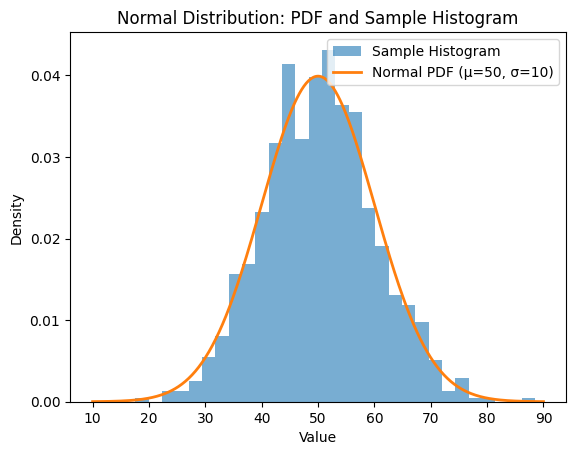

In [4]:
# Title: Exercise 3 — Generate and Plot a Normal Distribution
# Task: Generate a normal distribution with mean=50 and std=10, then plot its PDF and a sample histogram.

mu, sigma = 50, 10
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)

# Normal PDF using SciPy
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Sample random data from the same normal distribution
samples = norm.rvs(loc=mu, scale=sigma, size=1000, random_state=42)

print_separator("Normal Distribution Basics")
print(f"Target mean (mu): {mu}")
print(f"Target std (sigma): {sigma}")
print(f"Sample mean: {np.mean(samples):.2f}, Sample std: {np.std(samples, ddof=1):.2f}")

# Plot: histogram of samples + PDF curve (separate plots recommended in some setups;
# here we show one figure with both for convenience)
plt.figure()
plt.hist(samples, bins=30, density=True, alpha=0.6, label="Sample Histogram")
plt.plot(x, pdf, linewidth=2, label="Normal PDF (μ=50, σ=10)")
plt.title("Normal Distribution: PDF and Sample Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Exercise 4: T-Test Application

In [5]:
# Title: Exercise 4 — Independent Two-Sample T-Test
# Task: Perform a t-test on two randomly generated datasets.

# Generate two groups with different means
data1 = np.random.normal(50, 10, 100)
data2 = np.random.normal(60, 10, 100)

# Independent two-sample t-test (assumes equal variances by default if 'equal_var=True')
t_stat, p_val = ttest_ind(data1, data2, equal_var=True)

print_separator("Independent Two-Sample T-Test")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.6f}")

# Basic interpretation at alpha=0.05
alpha = 0.05
if p_val < alpha:
    print("Result: Reject H0 — The means are significantly different at α = 0.05.")
else:
    print("Result: Fail to reject H0 — No significant difference at α = 0.05.")


==================== Independent Two-Sample T-Test ====================
T-statistic: -8.5515
P-value: 0.000000
Result: Reject H0 — The means are significantly different at α = 0.05.


## Exercise 5: Linear Regression Analysis


==================== Linear Regression Results ====================
Slope: 1828.77
Intercept: 64383.56
R (correlation): 0.9942
P-value: 5.305350e-04
Std. Error of slope: 114.2693
Predicted price for 90 m^2: 228,973

Interpretation (English):
- The slope indicates the average change in price per additional square meter.
- Here, a positive slope means larger houses tend to cost more.
- The intercept represents the model's estimated price when size is zero (not meaningful in practice, but part of the linear model).


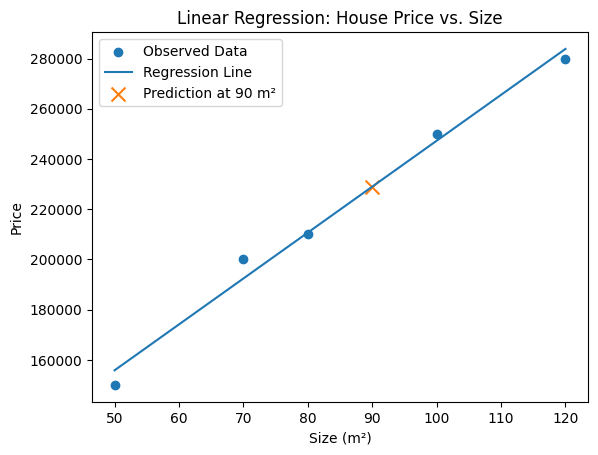

In [6]:
# Title: Exercise 5 — Linear Regression for Housing Prices
# Task: Regress house_prices on house_sizes; compute slope/intercept; predict price at size=90.

house_sizes = np.array([50, 70, 80, 100, 120], dtype=float)  # square meters
house_prices = np.array([150_000, 200_000, 210_000, 250_000, 280_000], dtype=float)

# Fit linear regression using SciPy
res = linregress(house_sizes, house_prices)

slope = res.slope
intercept = res.intercept
r = res.rvalue
p = res.pvalue
stderr = res.stderr

# Predict price for 90 m^2
size_to_predict = 90.0
predicted_price = slope * size_to_predict + intercept

print_separator("Linear Regression Results")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R (correlation): {r:.4f}")
print(f"P-value: {p:.6e}")
print(f"Std. Error of slope: {stderr:.4f}")
print(f"Predicted price for {size_to_predict:.0f} m^2: {predicted_price:,.0f}")

# Interpretation (printed as guidance)
print("\nInterpretation (English):")
print("- The slope indicates the average change in price per additional square meter.")
print("- Here, a positive slope means larger houses tend to cost more.")
print("- The intercept represents the model's estimated price when size is zero (not meaningful in practice, but part of the linear model).")

# Optional: quick visualization
plt.figure()
plt.scatter(house_sizes, house_prices, label="Observed Data")
x_line = np.linspace(min(house_sizes), max(house_sizes), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, label="Regression Line")
plt.scatter([size_to_predict], [predicted_price], marker="x", s=100, label=f"Prediction at {size_to_predict:.0f} m²")
plt.title("Linear Regression: House Price vs. Size")
plt.xlabel("Size (m²)")
plt.ylabel("Price")
plt.legend()
plt.show()

## Exercise 6: Understanding ANOVA

In [7]:
# Title: Exercise 6 — One-Way ANOVA for Fertilizer Effect
# Task: Test if mean growth differs across three fertilizers.

fertilizer_1 = np.array([5, 6, 7, 6, 5], dtype=float)
fertilizer_2 = np.array([7, 8, 7, 9, 8], dtype=float)
fertilizer_3 = np.array([4, 5, 4, 3, 4], dtype=float)

F_stat, P_val = f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print_separator("One-Way ANOVA")
print(f"F-value: {F_stat:.4f}")
print(f"P-value: {P_val:.6f}")

alpha = 0.05
if P_val < alpha:
    print("Result: Reject H0 — At least one fertilizer has a different mean effect on growth.")
else:
    print("Result: Fail to reject H0 — No significant difference among fertilizers at α = 0.05.")

print("\nExplanation if P-value > 0.05 (English):")
print("- If P > 0.05, we do not have enough evidence to say the mean growth differs across groups.")
print("- Practically, this means observed differences could be due to random variation rather than a true effect.")


==================== One-Way ANOVA ====================
F-value: 28.5263
P-value: 0.000028
Result: Reject H0 — At least one fertilizer has a different mean effect on growth.

Explanation if P-value > 0.05 (English):
- If P > 0.05, we do not have enough evidence to say the mean growth differs across groups.
- Practically, this means observed differences could be due to random variation rather than a true effect.


## Exercise 7: Probability Distributions (Optional)

In [8]:
# Title: Exercise 7 (Optional) — Binomial Distribution
# Task: Probability of exactly 5 heads in 10 fair coin flips.

n = 10          # number of trials
p = 0.5         # probability of success (heads)
k = 5           # number of successes

prob_exact_5 = binom.pmf(k, n, p)

print_separator("Binomial Probability")
print(f"P(X = {k}) for X ~ Binomial(n={n}, p={p}): {prob_exact_5:.6f}")

# Bonus: probability of at most 5 heads (CDF)
prob_at_most_5 = binom.cdf(5, n, p)
print(f"P(X <= 5): {prob_at_most_5:.6f}")


==================== Binomial Probability ====================
P(X = 5) for X ~ Binomial(n=10, p=0.5): 0.246094
P(X <= 5): 0.623047


## Exercise 8: Correlation Coefficients (Optional)

In [9]:
# Title: Exercise 8 (Optional) — Pearson and Spearman Correlations
# Task: Compute Pearson and Spearman correlations between age and income.

data = pd.DataFrame({
    'age':    [23, 25, 30, 35, 40],
    'income': [35000, 40000, 50000, 60000, 70000]
})

x = data['age'].to_numpy(dtype=float)
y = data['income'].to_numpy(dtype=float)

pearson_r, pearson_p = pearsonr(x, y)
spearman_r, spearman_p = spearmanr(x, y)

print_separator("Correlation Coefficients")
print("Data:")
print(data)
print(f"\nPearson r: {pearson_r:.4f}, p-value: {pearson_p:.6f}")
print(f"Spearman ρ: {spearman_r:.4f}, p-value: {spearman_p:.6f}")

print("\nInterpretation (English):")
print("- Pearson measures linear correlation; Spearman measures monotonic relationship via ranks.")
print("- With perfectly increasing pairs like here, both correlations tend to be very high.")


==================== Correlation Coefficients ====================
Data:
   age  income
0   23   35000
1   25   40000
2   30   50000
3   35   60000
4   40   70000

Pearson r: 0.9997, p-value: 0.000007
Spearman ρ: 1.0000, p-value: 0.000000

Interpretation (English):
- Pearson measures linear correlation; Spearman measures monotonic relationship via ranks.
- With perfectly increasing pairs like here, both correlations tend to be very high.


## Conclusion & Key Takeaways

## Exercise 1 — SciPy Basics
- You confirmed the SciPy installation and version.  
- Knowing the version ensures **API compatibility** and helps reproduce results.

## Exercise 2 — Descriptive Statistics
- **Mean** and **median** summarize central tendency; variance and standard deviation summarize **spread**.  
- On the provided data, mean and median are close, suggesting **no extreme outliers**.  
- Reporting whether you used **population (ddof=0)** or **sample (ddof=1)** formulas is good practice.

## Exercise 3 — Normal Distribution
- You generated a theoretical **Normal(μ=50, σ=10)** and sampled from it.  
- The **PDF curve** shows the ideal density; the **histogram** of samples approximates it, improving with larger sample sizes.  
- Comparing **sample mean/std** to target μ, σ validates the sampling process (deviations shrink as *n* grows).

## Exercise 4 — T-Test
- The independent two-sample **t-test** evaluates whether two group means differ beyond random noise.  
- A **small p-value** (typically < 0.05) indicates a **statistically significant** difference in means.  
- Always check assumptions: approximate **normality** and (if using the equal-variance test) **homoscedasticity**. Use Welch’s t-test if variances differ.

## Exercise 5 — Linear Regression
- The **slope** represents the **average change in price per additional square meter** (currency units per m²).  
- The **intercept** is the estimated price at 0 m² (often not meaningful physically, but part of the model).  
- Prediction at **90 m²** uses the fitted line \( \hat{y} = \text{slope} \cdot x + \text{intercept} \).  
- Reporting **r**, **p-value**, and **standard error** provides strength of relationship, significance, and uncertainty.

## Exercise 6 — One-Way ANOVA
- ANOVA compares **means across ≥3 groups** using the **F-statistic**.  
- A **small p-value** indicates at least one group mean differs; with a larger p-value (≥ 0.05), you **fail to reject** equality of means.  
- If significant, follow up with **post-hoc tests** (e.g., Tukey HSD) to identify which groups differ.  
- Check assumptions: **independence**, **normality** within groups, and **homogeneity of variances**.

## Exercise 7 (Optional) — Binomial Probability
- You computed \( P(X=5) \) for \( X \sim \text{Binomial}(n=10, p=0.5) \).  
- This demonstrates using **PMF** for exact outcomes and **CDF** for cumulative probabilities.  
- Binomial modeling is useful for **count data** with fixed trials and constant success probability.

## Exercise 8 (Optional) — Correlations
- **Pearson r** measures **linear** association; **Spearman ρ** measures **monotonic** association via ranks (robust to outliers and nonlinearity).  
- On strictly increasing `age`–`income` pairs, both tend to be high, but they answer **slightly different questions**.

---

## Overall Reflections
- You practiced a full **statistical workflow**: describe data → choose model/test → check assumptions → interpret effect and uncertainty.  
- **P-values** indicate evidence against a null hypothesis; complement them with **effect sizes** (e.g., slope magnitude) and **confidence intervals**.  
- **Visualization** (histograms, PDFs, scatter plots, regression line) is essential to interpret and communicate results.  
- For reproducibility, fix random seeds and record **library versions**.  
- In real projects, always consider **data quality**, **outliers**, and whether assumptions hold; choose robust alternatives when needed.